In [1]:
# Bibliotecas de manipulação
import pandas as pd
import numpy as np

# Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns


# Retirar os avisos do Pandas
import warnings
warnings.filterwarnings('ignore')

# Presets para todo o programa

In [2]:
# Define a quantidade de linhas e colunas que serão mostradas dos datasets
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

In [3]:
# Define o tamanho dos gráficos
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

# Exploração de dados

In [4]:
# Quanto vale o aluguel da sua casa?

In [5]:
# Lendo os dados
base_dados = pd.read_csv('house_data.csv')

In [6]:
base_dados.shape

(10692, 13)

In [7]:
base_dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [8]:
# existem colunas que não servem ao propósito.

In [9]:
# Removendo colunas
base_dados.drop(columns=['fire insurance (R$)', 'total (R$)'], inplace=True)

base_dados.shape

(10692, 11)

In [10]:
# Dados vazios

#isnull vai passar uma series booleana para o valor das instancias. Se tivesse algum dado nulo estaria como 1.
base_dados.isnull().sum().sort_values(ascending=False)

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [11]:
# Dados únicos
base_dados.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [12]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [13]:
base_dados.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                object
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

In [14]:
base_dados.dtypes.value_counts()

int64     7
object    4
dtype: int64

# Exploração Analítica (EDA)

Com os valores inteiros é possível fazer gráfico de densidade, box plot e etc. 
Com os valores categóricos, objetos, a análise precisa ser diferente.

In [15]:
# Filtrar os tipos de colunas

colunas_categoricas = base_dados.columns[base_dados.dtypes == object]

colunas_numericas = base_dados.columns[base_dados.dtypes != object]

In [16]:
colunas_categoricas, colunas_numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [17]:
# Análise dos campos objetos
base_dados['city'].value_counts(normalize = True) * 100

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

In [18]:
# Loop
for x in colunas_categoricas:
    Y = base_dados[x].value_counts(normalize = True) * 100
    print(x, '\n', Y, '\n')
# vai passar para city, floor, animal e forniture a contagem em %
# em floor o andar 301 é outlier
# essa é uma 'foto' de como o modelo será treinado com os dados.
# futuramente esse comportamento poderá mudar.

city 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64 

floor 
 -      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64 

animal 
 acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

furniture 
 not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64 



# Tratando os dados

## Ajustando o Andar 301

In [19]:
# loc para localizar

base_dados.loc[base_dados['floor'] == '301' ]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164


In [20]:
# iloc recebe o índex
base_dados.iloc[2562]

city                 Belo Horizonte
area                             80
rooms                             3
bathroom                          2
parking spaces                    2
floor                           301
animal                        acept
furniture             not furnished
hoa (R$)                        750
rent amount (R$)               2600
property tax (R$)               164
Name: 2562, dtype: object

In [21]:
# agora adiciona a coluna que está o floor
# no índice 2562 e coluna 5 temos o valor 301 que vamos corrigir para 30

base_dados.iloc[2562, 5]

'301'

In [22]:
base_dados.iloc[2562, 5] = 30

## Ajustando o '-'

In [23]:
base_dados['floor'] = base_dados['floor'].apply (lambda x : 0 if x == '-' else x)

In [24]:
# verificando os últimos registros
# o último registro dado como 0 de fato era - indicando que a função funcionou
base_dados.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165


In [25]:
base_dados.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                object
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

In [26]:
# mesmo após a transformação dos - em 0, a coluna floor continua como object
# para isso precisa passar um to_numeric para que serja inteiro

base_dados['floor'] = pd.to_numeric(base_dados['floor'])

In [27]:
base_dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [28]:
base_dados['floor'].value_counts( normalize = True )

0     0.230172
1     0.101104
2     0.092125
3     0.087074
4     0.069959
5     0.056117
6     0.050412
7     0.046483
8     0.045829
9     0.034512
10    0.033389
11    0.028339
12    0.024037
13    0.018706
14    0.015900
15    0.013749
16    0.010195
17    0.008979
18    0.007015
19    0.004957
20    0.004115
21    0.003928
25    0.002338
23    0.002338
22    0.002245
26    0.001871
24    0.001777
27    0.000748
28    0.000561
29    0.000468
32    0.000187
35    0.000094
46    0.000094
30    0.000094
51    0.000094
Name: floor, dtype: float64

Hífem e andar 301 resolvidos

# Gráficos

[(0.92354597, 0.62457749, 0.46433898),
 (0.91649756, 0.55981483, 0.42526631),
 (0.90732341, 0.4939774, 0.38990532),
 (0.89360794, 0.42764714, 0.36618273),
 (0.87199254, 0.3633634, 0.35974223),
 (0.83765537, 0.30784814, 0.3723105),
 (0.78922456, 0.26773176, 0.3948046),
 (0.72957096, 0.24404127, 0.4156828),
 (0.66635279, 0.22717328, 0.43008427),
 (0.60407977, 0.21017746, 0.43913439),
 (0.54221157, 0.19375869, 0.44233698),
 (0.47936222, 0.18006056, 0.43733022),
 (0.41614149, 0.16791429, 0.42384614),
 (0.353885, 0.15471714, 0.40432831)]

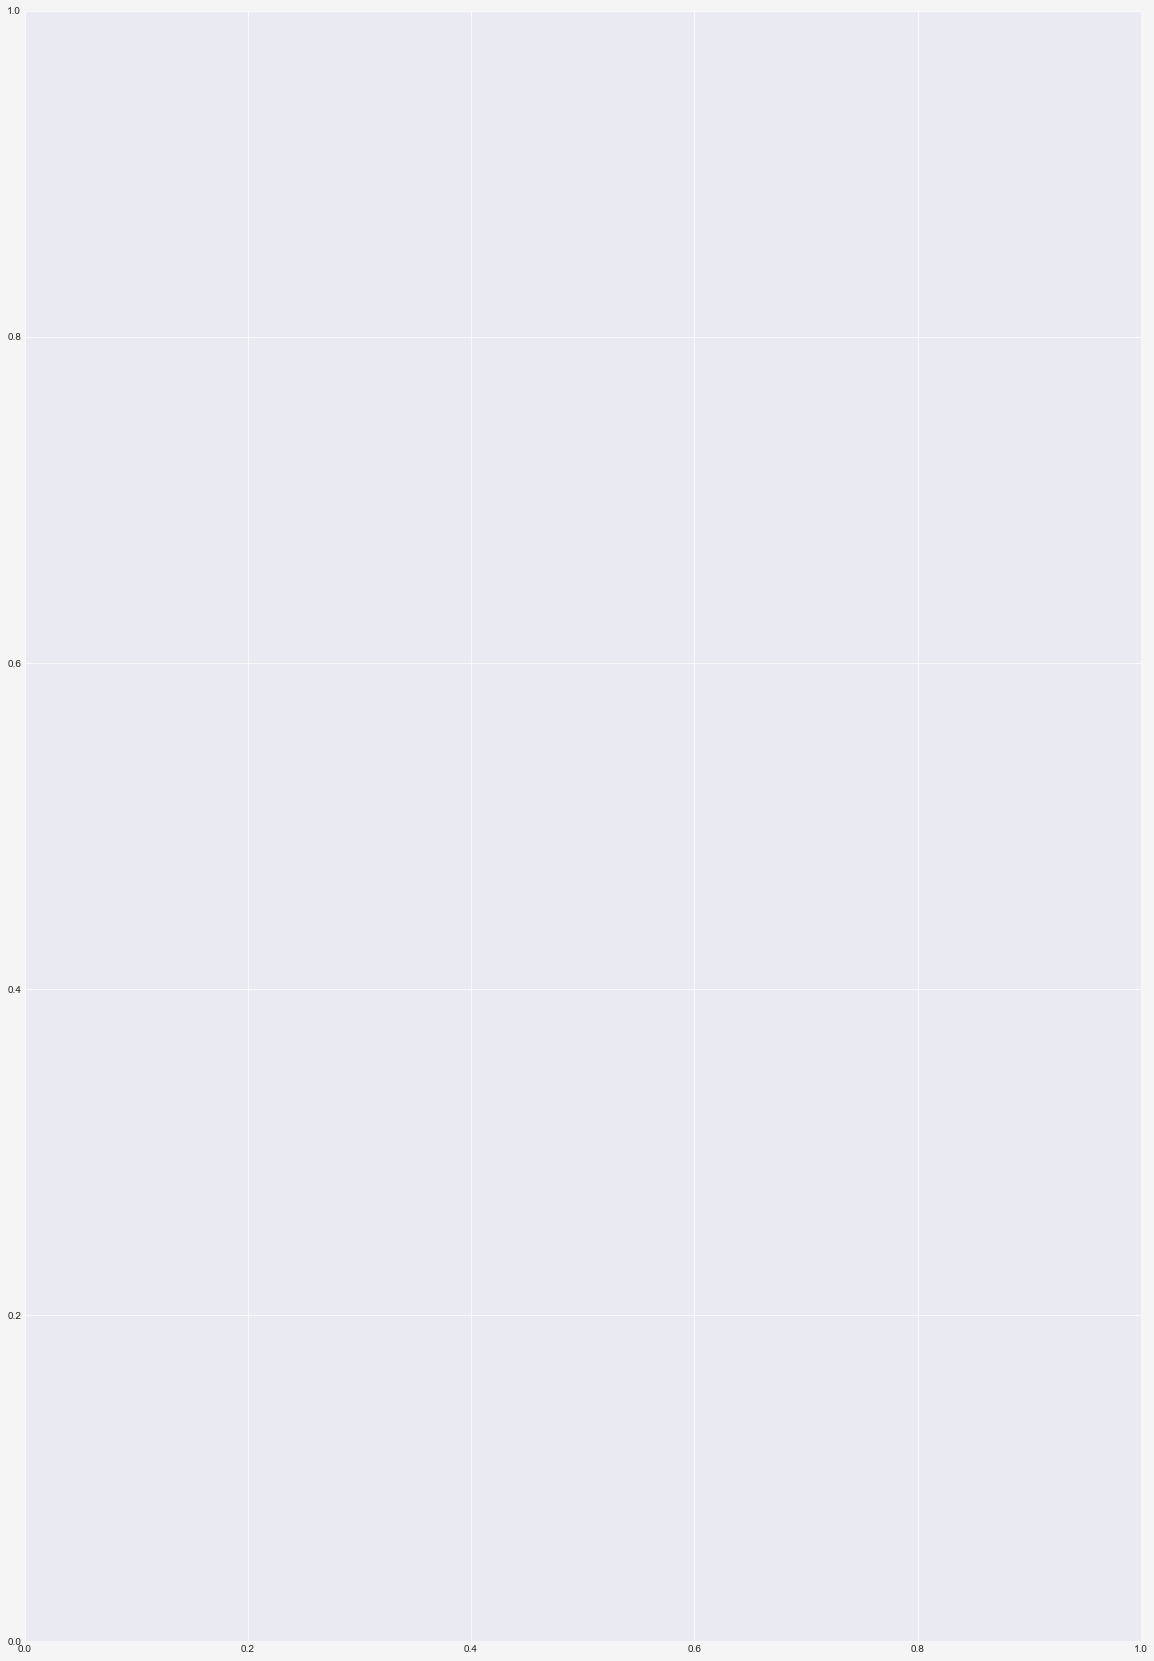

In [29]:
# Tamanho
figura, eixo = plt.subplots(figsize = (20, 30))

# Cor de fundo
cor_fundo = '#f5f5f5'
figura.set_facecolor (cor_fundo)

# Paleda de cores
# color_palette ('flare', x) irá recomendar x cores diferentes dentro da paleta Flare
sns.color_palette('flare', len(colunas_numericas)*2)

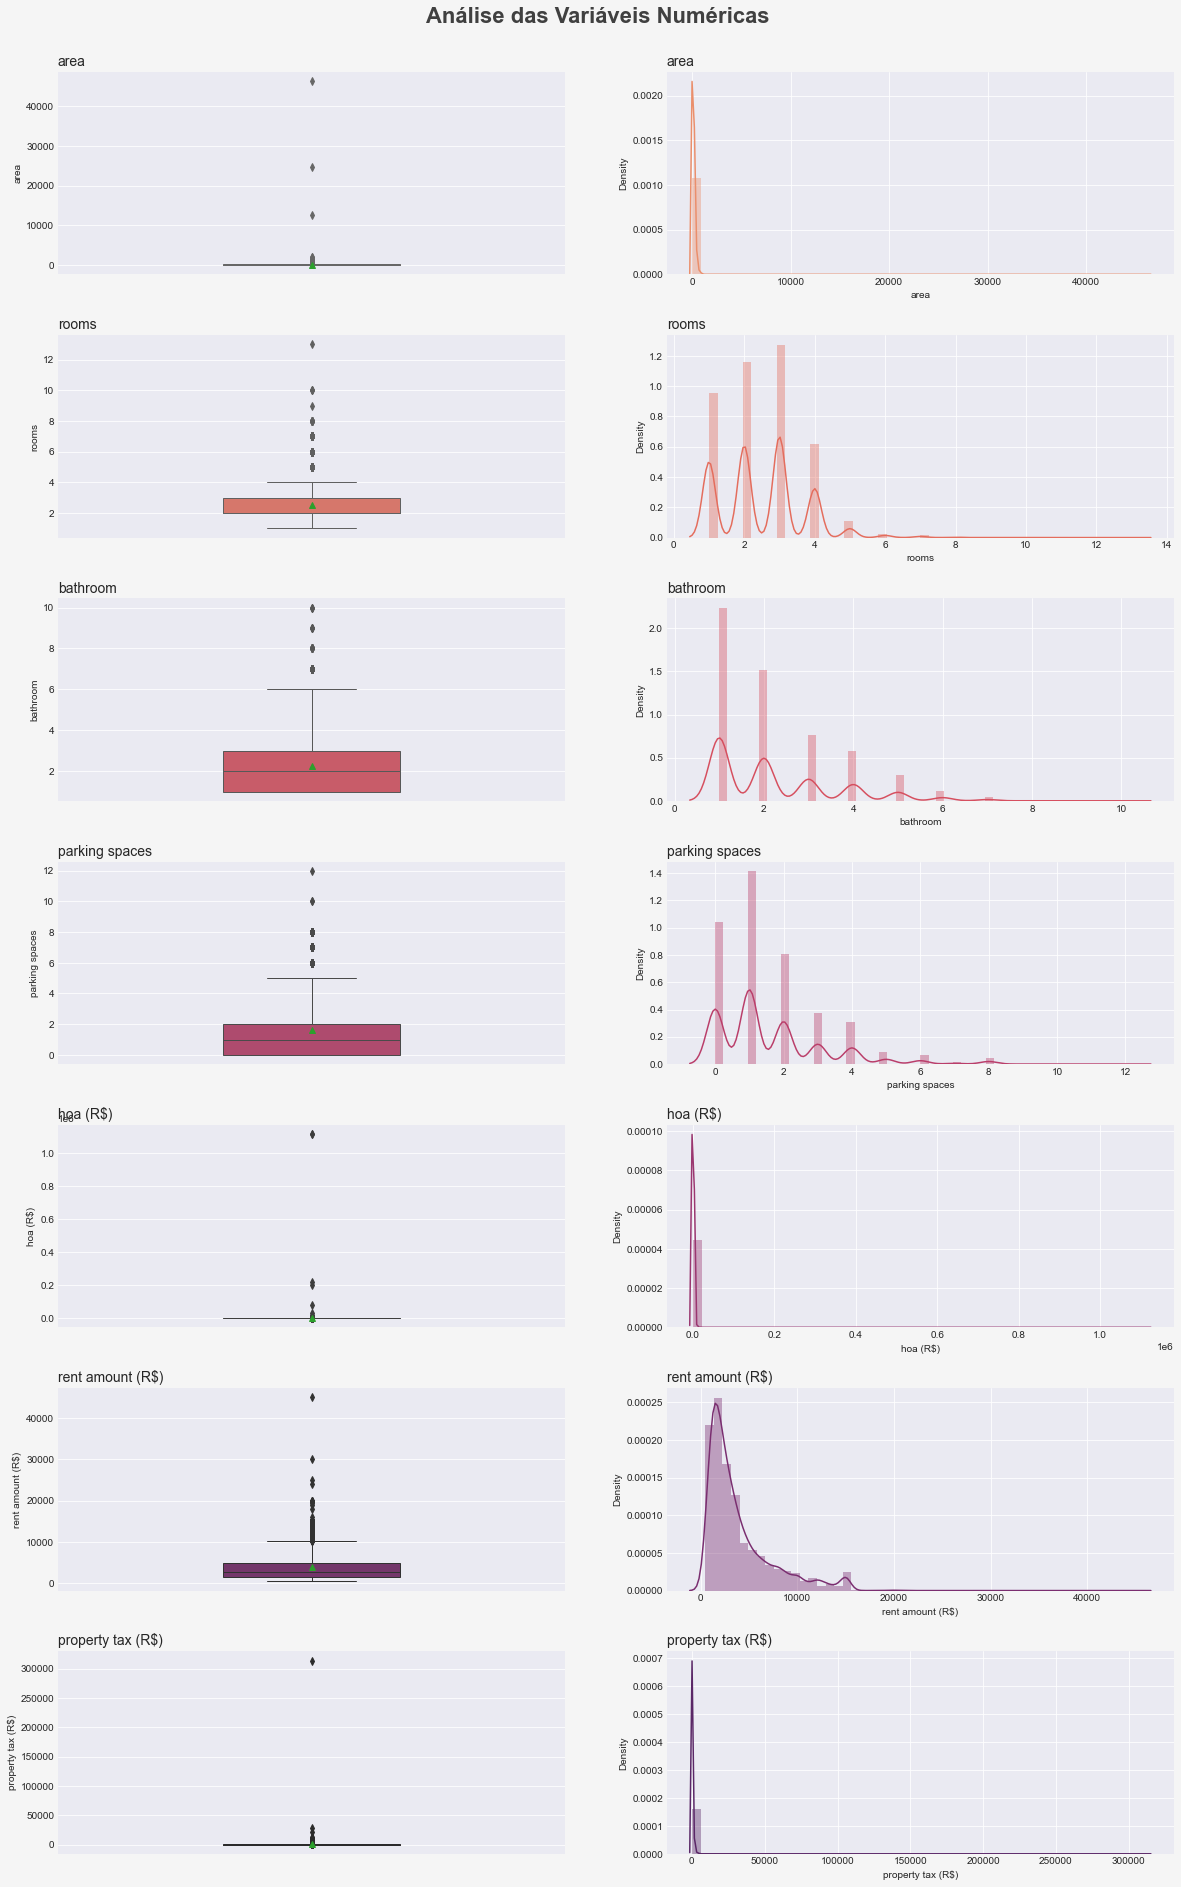

In [30]:
# Tamanho
figura, eixo = plt.subplots(figsize = (20, 30))

# Cor de fundo
cor_fundo = '#f5f5f5'
figura.set_facecolor (cor_fundo)

# Paleda de cores
# color_palette ('flare', x) irá recomendar x cores diferentes dentro da paleta Flare
paleta_cores = sns.color_palette('flare', len(colunas_numericas)*2)

#Título
plt.suptitle('Análise das Variáveis Numéricas', fontsize = 22, color ='#404040', fontweight = 600)


posicao = 1

# Loop para plotar os gráficos
# 7 linhas e 2 colunas no grid
# o distplot cria uma crid com posições 1, 2, 3... 
# para acessar cada posição é preciso definir +=x


for x in colunas_numericas:
    plt.subplot (7, 2, posicao)
    plt.title ( f'{x}', loc = 'left',fontsize = 14, fontweight = 200)
    sns.boxplot(data = base_dados, y = x, showmeans = True,
               saturation = 0.8, linewidth = 1, 
               color = paleta_cores[posicao], width = 0.35
               ) 
                # showmeans = mostra a média
                # saturation = saturação das cores dentro do gráfico
                # linewidth = espessura do contorno do gráfico
                # color = puxa a paleta selecionada e define para cada gráfico (x = posicao)
                # wigth = largura do gráfico
                
    posicao += 1
    
    plt.subplot (7, 2, posicao)
    plt.title ( f'{x}', loc = 'left',fontsize = 14, fontweight = 200)
    sns.distplot(base_dados[x], color = paleta_cores[posicao - 1])
    #posicao -1 para ficar com a cor = ao do gráfico à direita
    
    posicao += 1
    
    # top = espaço do título até os gráficos
    # hspace = espaço de um gráfico pro outro
    
plt.subplots_adjust(top = 0.95, hspace = 0.3)

## Ajustando os campos

In [31]:
base_dados.loc[base_dados['area'] <= 10000]['area'].describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

In [32]:
# Condomínio

base_dados['hoa (R$)'].max()

1117000

In [33]:
base_dados.loc[base_dados['hoa (R$)'] <= 10000]['hoa (R$)'].describe()

count    10683.000000
mean       911.949827
std       1104.885520
min          0.000000
25%        170.000000
50%        558.000000
75%       1230.000000
max      10000.000000
Name: hoa (R$), dtype: float64

In [34]:
# existem valores muito altos para um condomínio

base_dados['hoa (R$)'].sort_values(ascending = False).head(20)

255      1117000
6979     1117000
6230      220000
2859      200000
2928       81150
1444       32000
1213       15000
415        14130
5293       14000
8858       10000
974        10000
547         9900
7020        9500
7679        9000
1862        8600
6185        8500
1072        8500
10184       8362
254         8300
722         8133
Name: hoa (R$), dtype: int64

In [35]:
base_dados.iloc[255]

city                 Belo Horizonte
area                            155
rooms                             1
bathroom                          4
parking spaces                    0
floor                             4
animal                    not acept
furniture             not furnished
hoa (R$)                    1117000
rent amount (R$)               2790
property tax (R$)                64
Name: 255, dtype: object

In [36]:
base_dados.iloc[6230]

city                     São Paulo
area                           340
rooms                            5
bathroom                         4
parking spaces                   2
floor                            7
animal                       acept
furniture            not furnished
hoa (R$)                    220000
rent amount (R$)             12000
property tax (R$)             1000
Name: 6230, dtype: object

In [37]:
base_dados.iloc[2928]

city                 Rio de Janeiro
area                             35
rooms                             1
bathroom                          1
parking spaces                    0
floor                             1
animal                        acept
furniture                 furnished
hoa (R$)                      81150
rent amount (R$)               4500
property tax (R$)              9900
Name: 2928, dtype: object

In [38]:
# um condomínio de 9.900 faz sentido para uma área de 580m e o aluguel 15.000 e IPTU 2.200
# os outros exemplos provavelmente foram erros de tabulação

base_dados.iloc[547]

city                     São Paulo
area                           580
rooms                            5
bathroom                         5
parking spaces                   4
floor                            4
animal                       acept
furniture            not furnished
hoa (R$)                      9900
rent amount (R$)             15000
property tax (R$)             2200
Name: 547, dtype: object

In [39]:
# o maior aluguel custa 45.000

base_dados['rent amount (R$)'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: rent amount (R$), dtype: float64

In [40]:
#filtrando os menores que 40.000

base_dados.loc[base_dados['rent amount (R$)'] <= 40000]['rent amount (R$)'].describe()

count    10691.000000
mean      3892.402488
std       3385.440586
min        450.000000
25%       1530.000000
50%       2660.000000
75%       5000.000000
max      30000.000000
Name: rent amount (R$), dtype: float64

In [41]:
# IPTU
# o IPTU de 300.000 parece fora da amostra

base_dados['property tax (R$)'].sort_values(ascending = False).head(20)

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
2928       9900
7674       9500
19         9500
8187       8750
2182       8750
5915       7859
7679       5917
9765       5834
421        5700
3494       5500
7459       5404
10410      5200
9595       5160
8399       5032
1862       5000
Name: property tax (R$), dtype: int64

In [42]:
base_dados.iloc[6645]

# Condomínio de 690
# Aluguel de 2.500
# IPTU não condiz

city                     São Paulo
area                            42
rooms                            1
bathroom                         2
parking spaces                   1
floor                            6
animal                   not acept
furniture            not furnished
hoa (R$)                       690
rent amount (R$)              2500
property tax (R$)           313700
Name: 6645, dtype: object

# Engenharia de Features

In [43]:
# Ajuste das colunas categórias
# as colunas precisam ser convertidas em dados booleanos
# faremos isso através do comando map

colunas_categoricas

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')

In [44]:
base_dados['animal'] = base_dados['animal'].map ({'acept' : 1, 'not acept' : 0})
base_dados['furniture'] = base_dados['furniture'].map ({'furnished' : 1, 'not furnished' : 0})

In [45]:
# Filtro de SP
# Podemos treinar um modelo e aperfeçoa-lo para uma parte dos dados antes de treinar com todos eles
# Iremos fucar na cidade de SP e depois escalar para outras localidades

filtro_sp = base_dados.loc[base_dados['city'] == 'São Paulo']
filtro_sp.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [46]:
# Uma vez que criamos um filtro da cidade de SP, o campo cidade não é mais necessário dentro desse filtro

filtro_sp.drop(columns = ['city'], inplace = True)

In [47]:
# Separar os dados
# Na mesma relação temos as caracteristicas e o resultado experado
# Precisamos separar as caracteristicas do previsor

Caracteristicas = filtro_sp.drop(columns = ['rent amount (R$)'])

Previsor = filtro_sp['rent amount (R$)']

Caracteristicas.shape, Previsor.shape

((5887, 9), (5887,))

In [48]:
Caracteristicas.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,0,1200,1750
4,25,1,1,0,1,0,0,0,25
5,376,3,3,7,0,1,0,0,834
7,213,4,4,4,4,1,0,2254,1735


In [49]:
Previsor.head()

0    3300
1    4960
4     800
5    8000
7    3223
Name: rent amount (R$), dtype: int64

In [50]:
# Correlação

filtro_sp.corr()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


In [51]:
# import yellowbrick

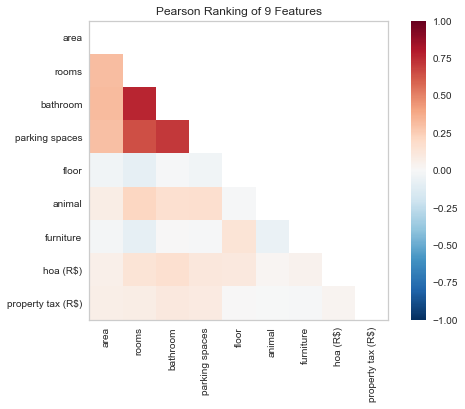

In [52]:
# Usando o Yellowbrick
# Quantidade de banheiros e vagas de garagem são as que mais tem correlação com o preço

from yellowbrick.features import Rank2D

correlacao = Rank2D(algoritmo='pearson')

correlacao.fit(Caracteristicas, Previsor)
correlacao.transform(Caracteristicas)
correlacao.show();

In [53]:
# Separar os dados entre teste e treino
# trains_test_split irá separar os dados em dados de treino e de teste para a aplicação

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(
    Caracteristicas, Previsor, test_size=0.2, random_state=10)

print(f'dados de treino: {x_treino.shape[0]}')
print(f'dados de teste: {x_teste.shape[0]}')

dados de treino: 4709
dados de teste: 1178


In [54]:
# Features mais relevantes
# Se alguma delas estiver muito próxima de 0, pode excluir

# mutual_info_regression irá fazer uma relação para identificar a dependencia de um paramentro com outro
# selectKBest irá selecionar quais são as melhores features (filtro).

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

# Selecao de features

def Selecao_Features(x_treino, y_treino):
    
    # score_func vai olhar para uma determinada função.
    Selecao = SelectKBest(score_func = mutual_info_regression, k = 'all')
    
    Selecao.fit(x_treino, y_treino)
    
    return Selecao

# Aplicar função

Scores = Selecao_Features(x_treino, y_treino)

# .scores_ traz as relações da função
# no caso irá trazer o que estava em mutual_info

for X, Y in enumerate (Scores.scores_):
    print(f'{x_treino.columns[X]} : {Y}')

area : 0.08418803061027402
rooms : 0.23423048236192257
bathroom : 0.3176401402240905
parking spaces : 0.25142577346638406
floor : 0.03568207142267843
animal : 0.017836750474928387
furniture : 0.02601868079317482
hoa (R$) : 0.07175119761897664
property tax (R$) : 0.1602181717263771


# Construção do Modelo

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Instanciar
# RandomForest tem diversos parâmetros
# Precisa setar o max_depth para ele não dar overfit

# Instanciar
Modelo_Floresta = RandomForestRegressor(max_depth = 5)

# Fitar
Modelo_Floresta.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5)

In [56]:
# Dados que fez as previsões de valor

x_teste.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
9659,25,1,1,0,0,0,0,0,84
4671,480,4,5,3,0,1,0,0,742
7122,226,3,4,3,6,1,0,2200,1209
4221,100,2,4,2,12,0,1,885,330
8920,35,1,1,1,14,0,0,1700,275


In [57]:
# O modelo pegou o x_teste e fez as previsões de quanto será o valor de aluguel

Previsoes = Modelo_Floresta.predict(x_teste)
Previsoes[0:5]

array([1542.09587657, 8771.86146438, 7883.68589299, 5057.63569088,
       3596.68177517])

In [58]:
# Dados reais de valor

y_treino.head()

7212    12000
2211      885
4147     3076
2644     4600
3375     4000
Name: rent amount (R$), dtype: int64

In [59]:
# Função para avaliar os resultados
# mean_squared_error - cálculo de variância de quanto o modelo está errrando na média
# O modelo está errando em 2.400 reais as previsões
# r2_score - cálculo de quanto o modelo se explica


from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print(f'RMSE: {sqrt(mean_squared_error(y_teste, Previsoes))}')
print(f'Score: {r2_score(y_teste, Previsoes)}')

RMSE: 2449.5257227363345
Score: 0.565734141496878


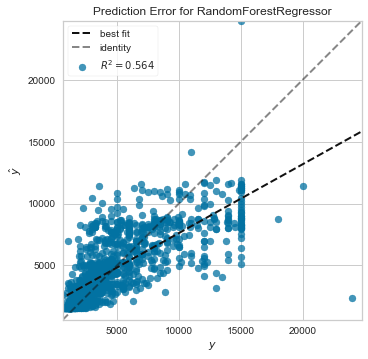

In [60]:
# Avaliando Yellowbrick
# identify: o modelo deveria seguir essa reta
# best fit: o comportamento real do modelo
# R²: score

from yellowbrick.regressor import PredictionError

# Instanciar

Modelo = RandomForestRegressor (max_depth = 5)
Erro_Modelo = PredictionError (Modelo)

# Fitar
Erro_Modelo.fit(x_treino, y_treino)
Erro_Modelo.score(x_teste, y_teste)
Erro_Modelo.show();

# Exportação

In [61]:
# esse será o arquivo levado para a API. 
# joblib.dump = Está salvo junto com o arquivo na máquina
# Versão 1.00

import joblib

joblib.dump (Modelo_Floresta, 'Modelo_floresta_Aleatorio_v100.pkl')

['Modelo_floresta_Aleatorio_v100.pkl']

In [62]:
# Testando o modelo treinado
# joblib.load = carrega o arquivo

Funcao_Modelo_Carregado = joblib.load('Modelo_floresta_Aleatorio_v100.pkl')

In [63]:
# Modelo rodando

Funcao_Modelo_Carregado.predict()

TypeError: predict() missing 1 required positional argument: 'X'

In [ ]:
# Primeiro imóvel da lista

x_teste.head(1)

In [ ]:
# O modelo fez a previsão do valor do primeiro imóvel da relação exportado

Funcao_Modelo_Carregado.predict(x_teste.head(1).values)